In [50]:
import glob
import numpy as np
import shutil
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

In [51]:
path = "/Users/nduginets/PycharmProjects/master-diploma/segmentations"

In [52]:
def get_vals(exec_type):
    items = glob.glob(os.path.join(path, exec_type + '*'))
    items = list(map(lambda x: os.path.join(x, 'test_metrics.json'), items))
    return items

In [53]:
classifier = get_vals("segmentation_")

pix2pix180 = get_vals("pix_2pix_segmentation_180_")

datasets = [
    ("segmentation_", classifier),
    ("pix_2pix_segmentation_180_", pix2pix180),
]

In [54]:
def to_map(d):
    dd = [json.loads("\n".join(open(i, "r").readlines())) for i in d]
    return [{int(k):v for k,v in d.items() } for d in dd]

In [55]:
data = [
    (n, to_map(d)) for n, d in datasets
]

In [56]:
def draw_metric(metric_name, datas):
    x = [i for i in range(100)]
    items = {}
    for name, ys in datas:
        y_values = []
        for idx in range(100):
            averages = []
            for f_idx in range(len(ys)):
                #print(name, idx, f_idx)
                #print(ys)
                averages.append(ys[f_idx][idx][metric_name])
            y_values.append(np.mean(np.array(averages)))
        items[name] = (x, y_values)

    plt.figure(figsize=(30, 10))
    plt.title(metric_name)
    for n, (x, y) in items.items():
        plt.plot(x, y, label=n)
    plt.legend()
    plt.show()
    plt.clf()

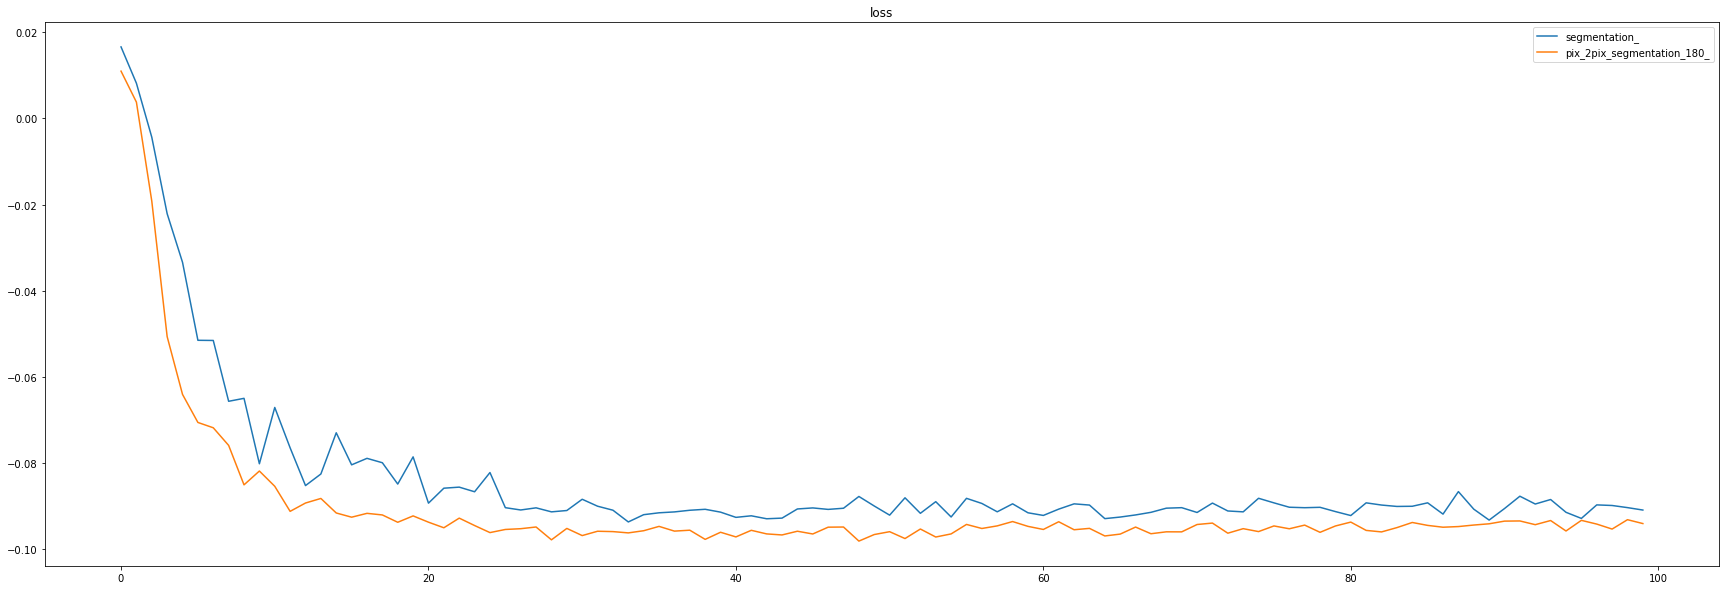

<Figure size 432x288 with 0 Axes>

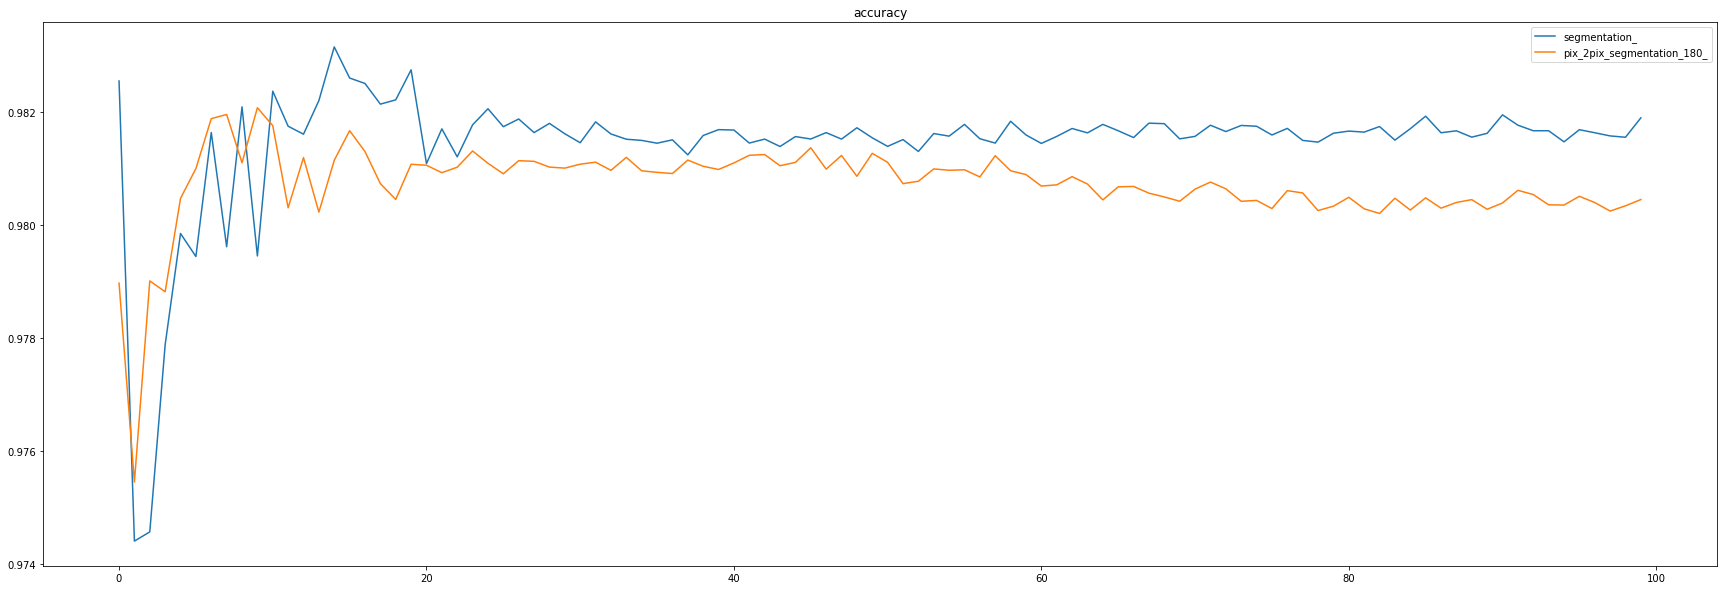

<Figure size 432x288 with 0 Axes>

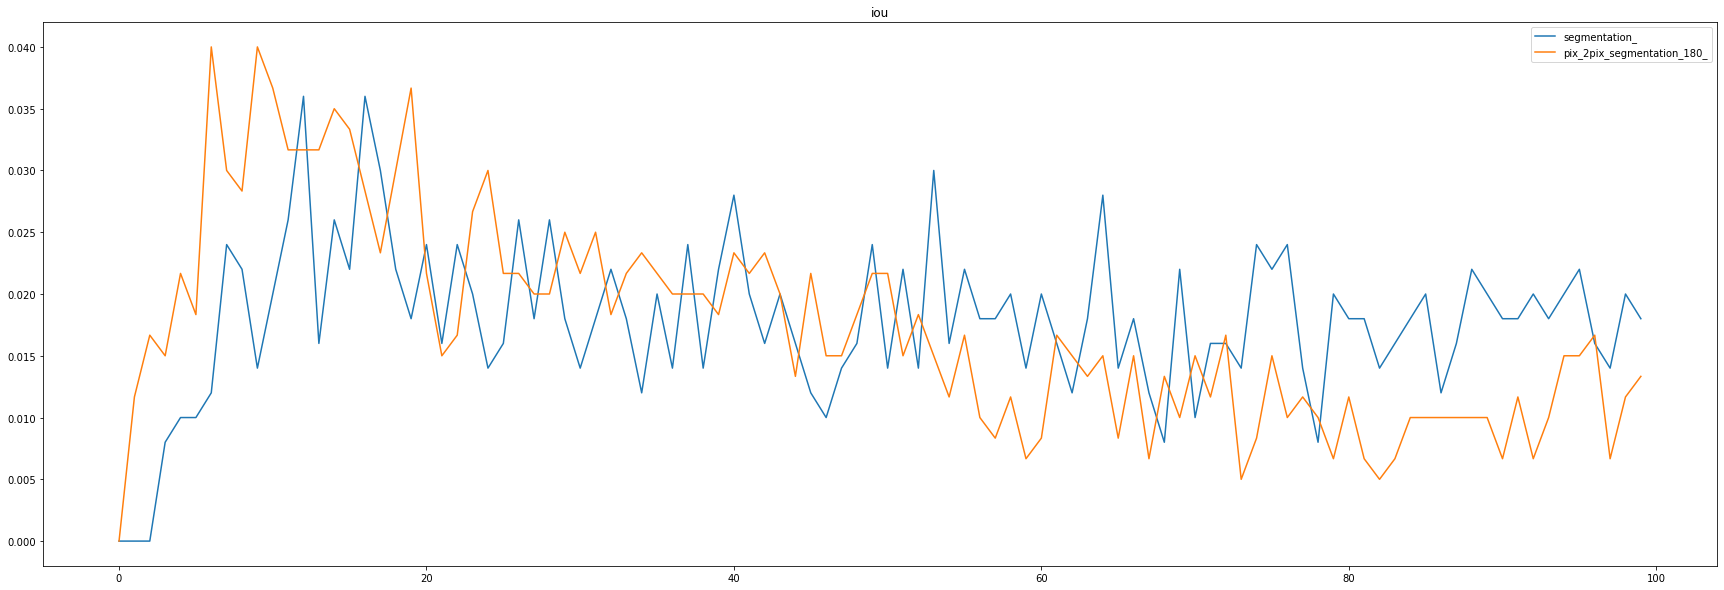

<Figure size 432x288 with 0 Axes>

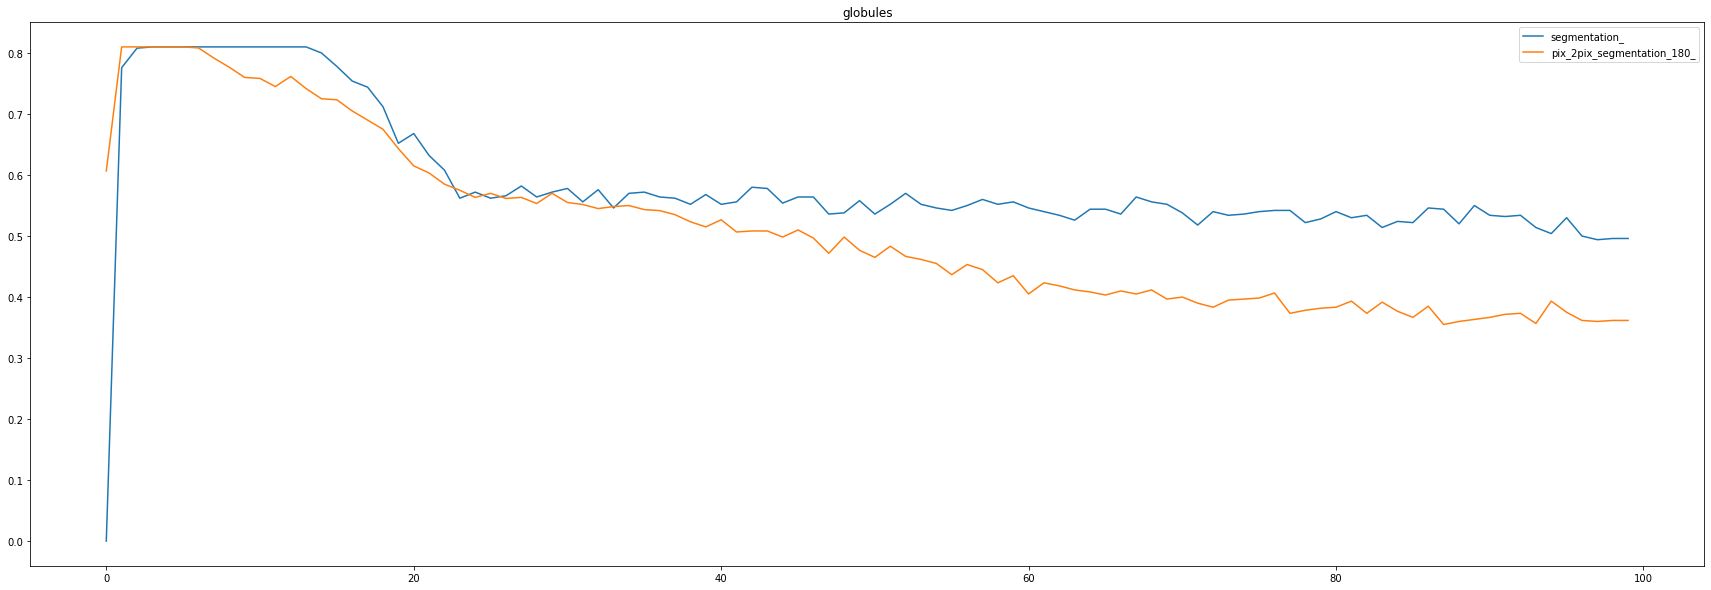

<Figure size 432x288 with 0 Axes>

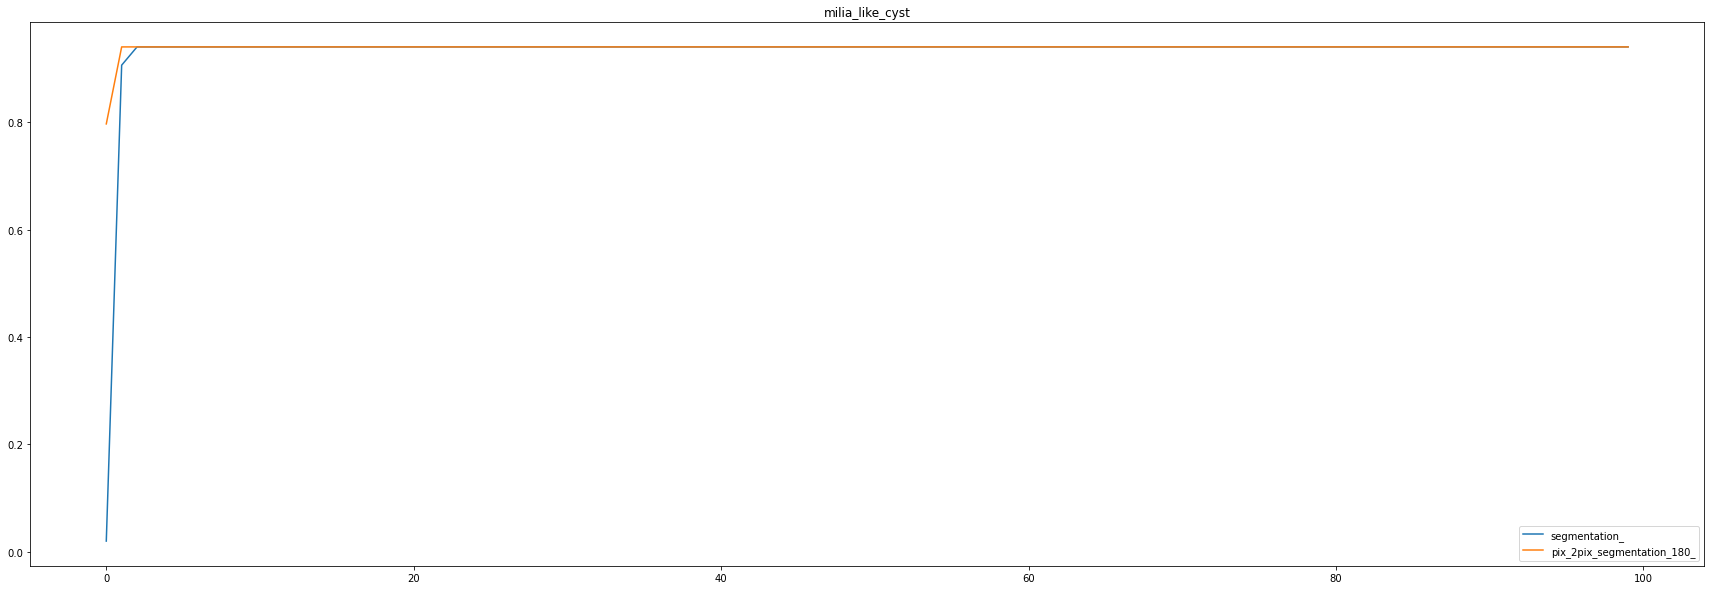

<Figure size 432x288 with 0 Axes>

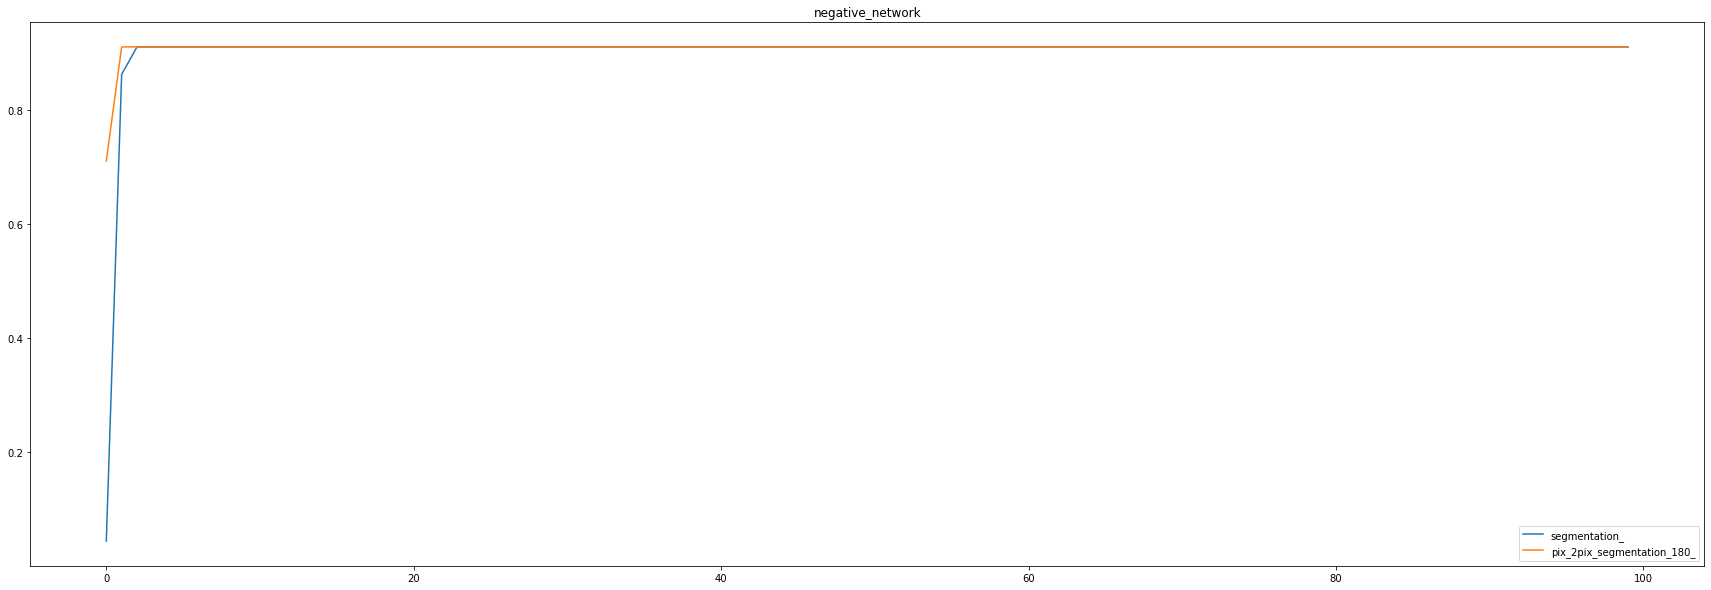

<Figure size 432x288 with 0 Axes>

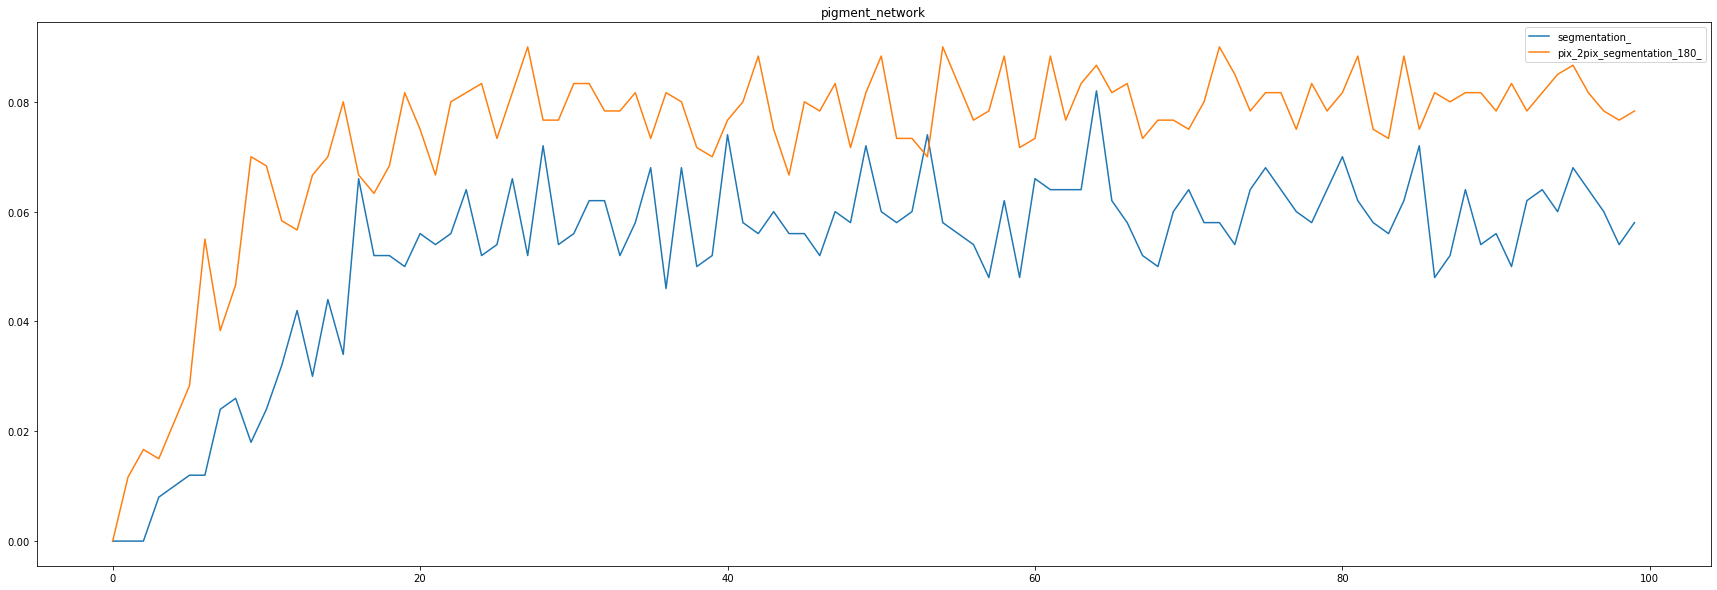

<Figure size 432x288 with 0 Axes>

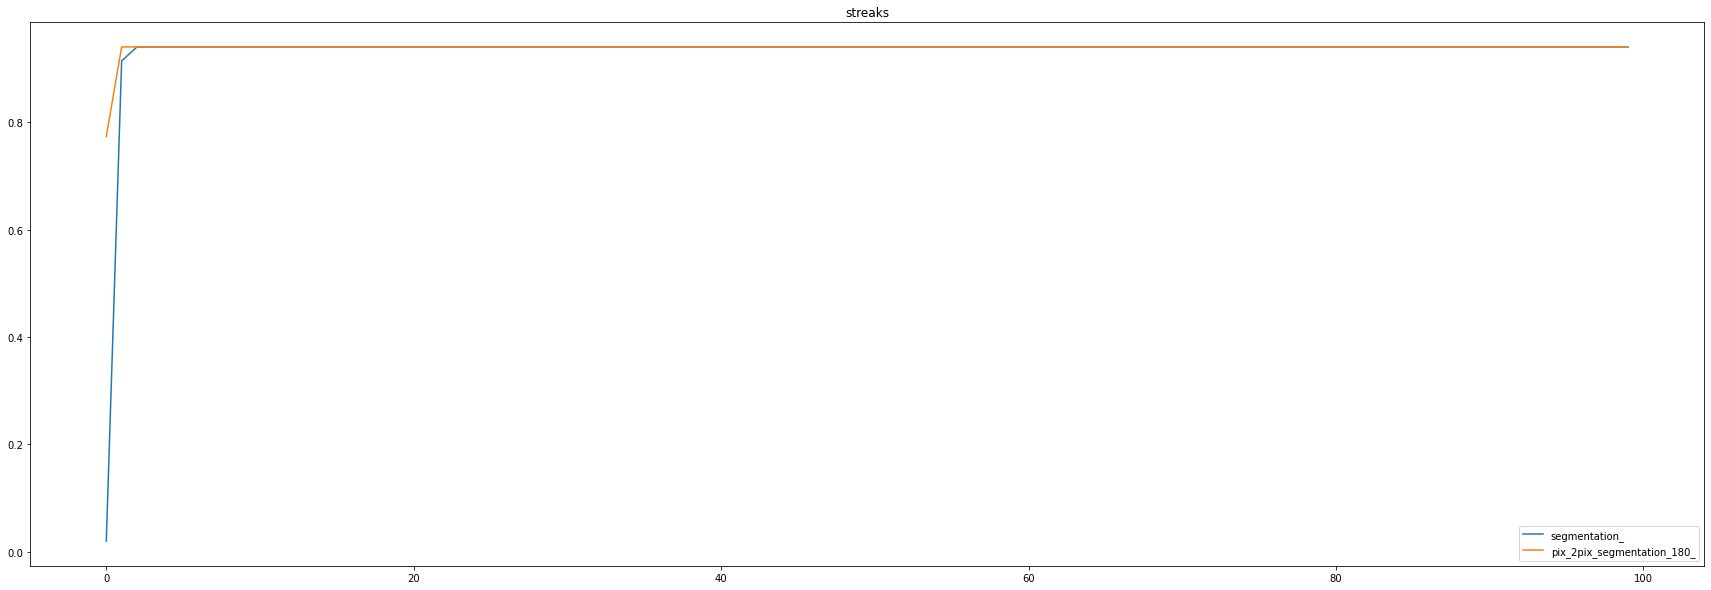

<Figure size 432x288 with 0 Axes>

In [58]:
draw_metric("loss", data)
draw_metric("accuracy", data)
draw_metric("iou", data)

draw_metric("globules", data)
draw_metric("milia_like_cyst", data)
draw_metric("negative_network", data)
draw_metric("pigment_network", data)
draw_metric("streaks", data)